In [1]:
# 加载需要的引用包
!pip install statsmodels --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [2]:
# 使用阿里巴巴 字体
!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Python/miniproject/01_draw_moon_cake/Alibaba-PuHuiTi-Medium.ttf

--2021-04-04 20:30:35--  http://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/Python/miniproject/01_draw_moon_cake/Alibaba-PuHuiTi-Medium.ttf
Resolving tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)... 47.95.85.21
Connecting to tianchi-media.oss-cn-beijing.aliyuncs.com (tianchi-media.oss-cn-beijing.aliyuncs.com)|47.95.85.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9560068 (9.1M) [font/ttf]
Saving to: ‘Alibaba-PuHuiTi-Medium.ttf.3’

100%[======================================>] 9,560,068   22.6MB/s   in 0.4s   

2021-04-04 20:30:36 (22.6 MB/s) - ‘Alibaba-PuHuiTi-Medium.ttf.3’ saved [9560068/9560068]



In [3]:
# -*- coding: utf-8 -*-
# 沪市指数走势预测，使用时间序列ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from itertools import product
from datetime import datetime, timedelta
from matplotlib.font_manager import FontProperties
import warnings

warnings.filterwarnings('ignore')
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
font_set = FontProperties(fname=r"Alibaba-PuHuiTi-Medium.ttf", size=12) ##可以自由下载字体使用

# 数据加载
df = pd.read_csv('./shanghai_index_1990_12_19_to_2021_03_02.csv', encoding='gb2312')
df

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2021-03-01,'000001,上证指数,3551.3998,3552.5665,3511.9888,3531.4802,3509.0804,42.3194,1.206,315487526,4.02477044217e+11
1,2021-02-26,'000001,上证指数,3509.0804,3550.4055,3500.7036,3514.5648,3585.0458,-75.9654,-2.119,333280067,4.24485913919e+11
2,2021-02-25,'000001,上证指数,3585.0458,3608.5568,3568.4735,3595.5424,3564.0799,20.9659,0.5883,366232299,4.44735017112e+11
3,2021-02-24,'000001,上证指数,3564.0799,3645.6474,3531.5936,3638.9359,3636.3573,-72.2774,-1.9876,362158952,4.8443041462e+11
4,2021-02-23,'000001,上证指数,3636.3573,3672.1511,3617.7013,3617.7013,3642.4449,-6.0876,-0.1671,398873174,4.7963181024e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
7374,1990-12-25,'000001,上证指数,120.2500,120.2500,114.5500,120.0900,114.55,5.7,4.976,15,6000.0
7375,1990-12-24,'000001,上证指数,114.5500,114.5500,109.1300,113.5700,109.13,5.42,4.9666,32,31000.0
7376,1990-12-21,'000001,上证指数,109.1300,109.1300,103.7300,109.0700,104.39,4.74,4.5407,28,16000.0
7377,1990-12-20,'000001,上证指数,104.3900,104.3900,99.9800,104.3000,99.98,4.41,4.4109,197,84000.0


In [4]:
# 选择我们要分析的列
df = df[['日期', '收盘价']]
# 对列名进行修改
df.columns = ['Timestamp', 'Price']
df

,Timestamp,Price
0,2021-03-01,3551.3998
1,2021-02-26,3509.0804
2,2021-02-25,3585.0458
3,2021-02-24,3564.0799
4,2021-02-23,3636.3573
...,...,...
7374,1990-12-25,120.2500
7375,1990-12-24,114.5500
7376,1990-12-21,109.1300
7377,1990-12-20,104.3900


In [5]:
# 将时间作为df的索引
df = df.sort_values('Timestamp', ascending=True)
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
df.head()

,Timestamp,Price
Timestamp,,
1990-12-19,1990-12-19,99.98
1990-12-20,1990-12-20,104.39
1990-12-21,1990-12-21,109.13
1990-12-24,1990-12-24,114.55
1990-12-25,1990-12-25,120.25


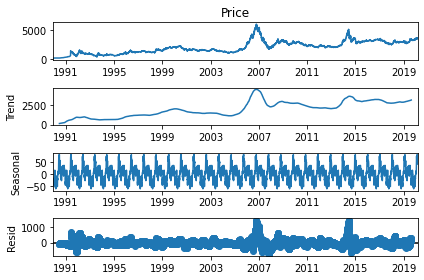

In [6]:
# 返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
# price = trend + seasonal + resid, 设置freq = 1年内的有效数据个数
result = sm.tsa.seasonal_decompose(df.Price, freq=250)
result.plot()
plt.show()

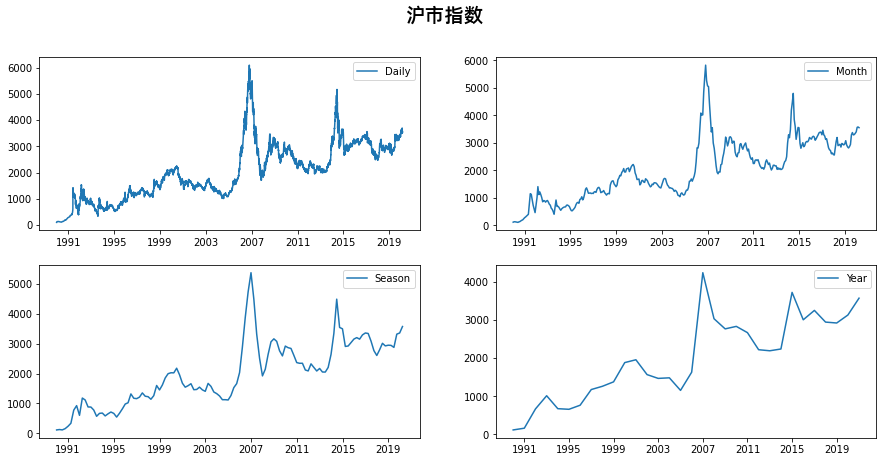

In [7]:
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

# 按照天，月，季度，年来显示沪市指数的走势
fig = plt.figure(figsize=[15, 7])
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('沪市指数', fontsize=20, fontproperties=font_set)
plt.subplot(221)
plt.plot(df.Price, '-', label='Daily')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Price, '-', label='Month')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Price, '-', label='Season')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Price, '-', label='Year')
plt.legend()
plt.show()

In [ ]:
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
print(parameters_list)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4)]


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    # 创建ARIMA模型
    try:
        # 对每月的趋势进行拟合（粒度粗），也可以对每天的趋势进行拟合（粒度细）
        model = ARIMA(df_month.Price, order=(param[0], param[1], param[2])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

    # 输出最优模型
print('最优模型: ', best_model.summary())

参数错误: (1, 1, 3)
参数错误: (1, 1, 4)
参数错误: (2, 1, 3)
参数错误: (2, 1, 4)
最优模型:                               ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  363
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2349.738
Method:                       css-mle   S.D. of innovations            156.496
Date:                Sun, 04 Apr 2021   AIC                           4719.476
Time:                        20:30:50   BIC                           4758.420
Sample:                    01-31-1991   HQIC                          4734.956
                         - 03-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3406     13.583      0.688      0.492     -17.281      35.962
ar.L1.D.Price     1.1757      0.181      6.502     

In [ ]:
df_month

,Price
Timestamp,
1990-12-31,116.990000
1991-01-31,132.628182
1991-02-28,131.887778
1991-03-31,126.011429
1991-04-30,118.426818
...,...
2020-11-30,3345.486281
2020-12-31,3399.719278
2021-01-31,3566.427985


In [ ]:
# 使用typ='levels' 对原始数据维度上进行预测，相当于进行了反差分
# 预测未来3个月（包含历史时间，从1991-01-31 到 2021-06-30）
price_pred = model.predict('1991-01-31', '2021-06-30', typ='levels')
price_pred

1991-01-31     126.330604
1991-02-28     144.063527
1991-03-31     137.952635
1991-04-30     129.840379
1991-05-31     124.131117
                 ...     
2021-02-28    3636.337848
2021-03-31    3565.161471
2021-04-30    3500.116804
2021-05-31    3505.245797
2021-06-30    3520.209874
Freq: M, Length: 366, dtype: float64

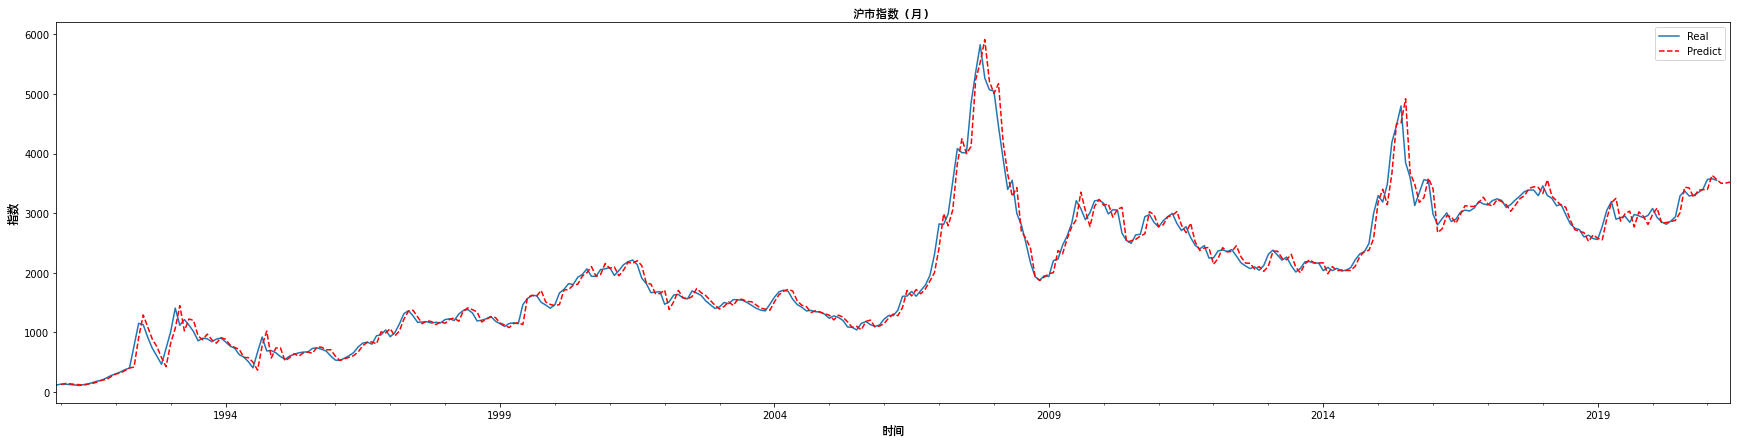

In [ ]:
# 沪市指数预测结果显示
plt.figure(figsize=(30,7))
df_month.Price.plot(label='Real')
price_pred.plot(color='r', ls='--', label='Predict')
plt.legend()
plt.title('沪市指数（月）', fontproperties=font_set)
plt.xlabel('时间', fontproperties=font_set)
plt.ylabel('指数', fontproperties=font_set)
plt.show()